In [1]:
elo_fn = '/scratch/zz737/fiar/tournaments/results/tournament_3/tournament_3_elo.txt'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
elo_df = pd.read_csv(open(elo_fn,'r'),delim_whitespace=True,header=0)
elo_df.head()

,Rank,Name,Elo,+,-,games,score,oppo.,draws
0,1,mcts100_cpuct2;35,340,40,38,376,81%,-2,15%
1,2,mcts100_cpuct2;39,317,39,38,376,78%,-2,13%
2,3,mcts100_cpuct3;35,311,38,36,376,78%,-2,19%
3,4,mcts100_cpuct3;34,309,37,36,376,78%,-2,20%
4,5,mcts100_cpuct3;36,307,36,35,376,78%,-2,25%


In [4]:
get_name_func = lambda x:x.split(';')[0] 
get_iter_func = lambda x:int(x.split(';')[1]) if len(x.split(';'))>1 else 0
get_mcts_func = lambda x:int(x.split('_')[0][4:]) if len(x.split('_'))>1 else 0 # applied to agent, not Name
get_cpuct_func = lambda x:int(x.split('_')[1][5:]) if len(x.split('_'))>1 else 0 # applied to agent, not Name

def preprocess_names(elo_df):
    elo_df['agent'] = elo_df['Name'].apply(get_name_func)
    elo_df['iter'] = elo_df['Name'].apply(get_iter_func)
    elo_df['mcts'] = elo_df['agent'].apply(get_mcts_func)
    elo_df['cpuct'] = elo_df['agent'].apply(get_cpuct_func)
    return elo_df

In [5]:
elo_df['agent'] = elo_df['Name'].apply(get_name_func)
elo_df['iter'] = elo_df['Name'].apply(get_iter_func)
elo_df['mcts'] = elo_df['agent'].apply(get_mcts_func)
elo_df['cpuct'] = elo_df['agent'].apply(get_cpuct_func)

In [6]:
elo_df.loc[elo_df['agent']=='mcts100_cpuct1']

,Rank,Name,Elo,+,-,games,score,oppo.,draws,agent,iter,mcts,cpuct
9,10,mcts100_cpuct1;38,287,36,35,376,76%,-2,24%,mcts100_cpuct1,38,100,1
12,13,mcts100_cpuct1;45,277,36,35,376,75%,-1,21%,mcts100_cpuct1,45,100,1
15,16,mcts100_cpuct1;47,275,35,34,376,76%,-1,26%,mcts100_cpuct1,47,100,1
20,21,mcts100_cpuct1;28,267,36,35,376,75%,-1,23%,mcts100_cpuct1,28,100,1
25,26,mcts100_cpuct1;30,258,35,34,376,74%,-1,27%,mcts100_cpuct1,30,100,1
32,33,mcts100_cpuct1;29,247,36,35,376,72%,-1,20%,mcts100_cpuct1,29,100,1
40,41,mcts100_cpuct1;37,241,36,35,376,71%,-1,21%,mcts100_cpuct1,37,100,1
41,42,mcts100_cpuct1;39,238,36,35,376,71%,-1,20%,mcts100_cpuct1,39,100,1
62,63,mcts100_cpuct1;21,197,35,34,376,67%,-1,19%,mcts100_cpuct1,21,100,1
67,68,mcts100_cpuct1;25,186,34,34,376,66%,-1,24%,mcts100_cpuct1,25,100,1


In [7]:
mask = (elo_df['Name']!='random') & (elo_df['Name']!='greedy')
elo_df_nn = elo_df.loc[mask]
elo_df_nn_sorted=elo_df_nn.groupby('agent').apply(lambda x:x.sort_values('iter',ascending=True))

<AxesSubplot:xlabel='iter', ylabel='Elo'>

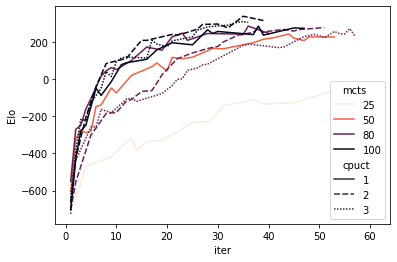

In [8]:
fig,ax = plt.subplots()
sns.lineplot(data=elo_df_nn_sorted,x='iter',y='Elo',hue='mcts',style='cpuct',palette='rocket_r',ax=ax)


# depth

In [6]:
import numpy as np

depth_root_dir = '/scratch/zz737/fiar/tournaments/tournament_3/depth/'
nsplits=5
nsubj = 189 # in depth 0-188; in splits 1-189
splits_root_dir = '/scratch/zz737/fiar/tournaments/tournament_3/moves/splits/'

d_list_per_subj_dict = {}
for s in range(nsubj):
    s_insplits=s+1
    d_list = []
    subj_name = np.loadtxt(f'{splits_root_dir}{s_insplits}/1.csv',dtype=str)[0,-2]
    for i in range(1,nsplits+1):
        depth_fn = f'{depth_root_dir}depth_tournament_3_{s}_{i}.txt'
        d = np.loadtxt(depth_fn)
        d_list.append(d)
    d_list_per_subj_dict[subj_name] = d_list


In [7]:
depth_df = pd.DataFrame(d_list_per_subj_dict).T
depth_df.index=depth_df.index.set_names('Name')
depth_df = depth_df.reset_index()
depth_df = preprocess_names(depth_df)


In [8]:
mask = (depth_df['Name']!='random') & (depth_df['Name']!='greedy')
depth_df_nn = depth_df.loc[mask]
depth_df_nn_sorted=depth_df_nn.groupby('agent').apply(lambda x:x.sort_values('iter',ascending=True))

In [9]:
depth_df_nn_sorted_for_plotting = depth_df_nn_sorted.melt(id_vars=['agent','iter','mcts','cpuct'],value_vars=list(range(4)),value_name='depth')
depth_df_nn_sorted_for_plotting['depth'] = depth_df_nn_sorted_for_plotting['depth'].astype(float)

In [39]:
# depth_mask = [type(n) is not str for n in depth_df_nn_sorted.columns]
# depth_data = depth_df_nn_sorted.loc[:,depth_mask]
# depth_df_nn_sorted['depth_mean'] = depth_data.mean(axis=1)
# depth_df_nn_sorted['depth_std'] = depth_data.sem(axis=1)

<AxesSubplot:xlabel='iter', ylabel='depth'>

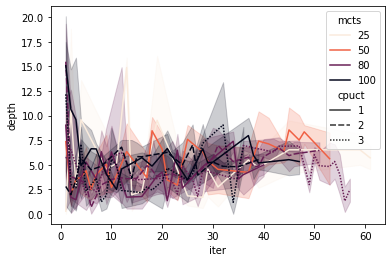

In [10]:
# sns.lineplot(data=df,x='iter',y='value',palette='rocket_r',ax=ax, estimator="mean",ci='sd')
fig,ax = plt.subplots()
sns.lineplot(data=depth_df_nn_sorted_for_plotting,x='iter',y='depth',hue='mcts',style='cpuct',palette='rocket_r',ax=ax,estimator="mean",ci=95)




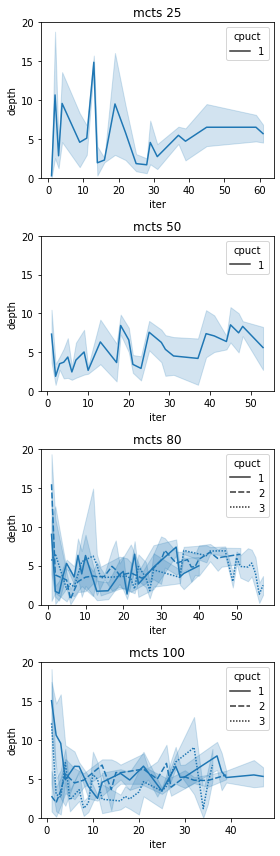

In [11]:
mcts = [25,50,80,100]
nfigs = len(mcts)
fig,ax = plt.subplots(nfigs,1,figsize=(4,3*nfigs))
for ii,m in enumerate(mcts):
    mask = depth_df_nn_sorted_for_plotting['mcts']==m
    sns.lineplot(data=depth_df_nn_sorted_for_plotting.loc[mask],x='iter',y='depth',style='cpuct',palette='rocket_r',ax=ax[ii],estimator='mean',ci=95)
    ax[ii].set_title(f'mcts {m}')
    ax[ii].set_ylim([0,20])
plt.tight_layout()


(0.0, 20.0)

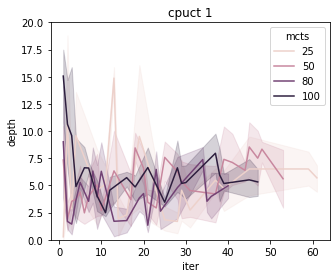

In [12]:

nfigs = 1
fig,ax = plt.subplots(nfigs,1,figsize=(5,4*nfigs))
mask = depth_df_nn_sorted_for_plotting['cpuct']==1
sns.lineplot(data=depth_df_nn_sorted_for_plotting.loc[mask],x='iter',y='depth',hue='mcts',ax=ax,estimator='mean',ci=95)
ax.set_title(f'cpuct 1')
ax.set_ylim([0,20])


* Depth of MCTS?
    * increase => difference between MCTS and cog model
    * also not increase => value function better?
* measure value function
    * absolute: frequency of win given state
    * relative: relative to the best player